In [55]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

# **Домашнее задание к уроку 2**

### Задание 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [56]:
# Геренация датасета
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 4, n_informative = 4, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [57]:
# Функция среднеквадратичной ошибки
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [58]:
# Функция градиентного спуска
def grad_desc(X, y, iterations, alpha):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        old_W = W.copy()
        W -= (alpha * (1/n * 2 * X.T @ (y_pred - y)))

        w_list.append(W.copy())
        errors.append(err)

        if i % 100 == 0:
            print(i, W, err)

        if np.linalg.norm(W - old_W, ord=2) < 1e-6:
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            errors.append(err)
            print(i, W, err)
            break
        
    w_list = np.array(w_list)
    
    return y_pred, W, w_list, errors

In [59]:
# Функция стохастического градиентного спуска
def sgd(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot(X_tmp.T, (y_pred_tmp - y_tmp))))
            
            w_list.append(W.copy())
            errors.append(err)

        if i % (iterations / 10) == 0:
            print(i, W, err)
        
        if i == iterations:
            y_pred_tmp = np.dot(X_tmp, W)
            errors.append(calc_mse(y_tmp, y_pred_tmp))
            print(i, W, err)
    
    w_list = np.array(w_list)
    
    return y_pred_tmp, W, w_list, errors

In [60]:
alpha = 1e-1
y_pred1, W1, w_list1, errors1 = grad_desc(data, target, 1000, alpha)

0 [ 1.00462007  7.14933914 11.18665826 16.68553148] 9843.498221175114
76 [ 3.73803295 35.63089806 52.35250162 77.79640507] 24.85594528606602


In [61]:
y_pred2, W2, w_list2, errors2 = sgd(data, target, 100, alpha=1e-1)

10 [ 3.11520688 30.96292138 45.617322   67.34850649] 219.19593749712905
20 [ 3.6300835  35.01922447 51.47726889 76.36204765] 0.6755167950147597
30 [ 3.71996596 35.54894963 52.24233209 77.59540416] 1.1056063654736374
40 [ 3.73467371 35.61821635 52.34240832 77.76406066] 1.6969835094030288
50 [ 3.73698453 35.62728489 52.35552404 77.78711036] 1.7859552433212016
60 [ 3.73733762 35.62847359 52.3572462  77.79025882] 1.798078461589774
70 [ 3.73739049 35.62862959 52.35747276 77.79068868] 1.7997111161672266
80 [ 3.73739829 35.62865008 52.35750262 77.79074735] 1.7999307787604322
90 [ 3.73739943 35.62865278 52.35750656 77.79075535] 1.7999603458232867
100 [ 3.73739959 35.62865313 52.35750708 77.79075644] 1.7999643279563282
100 [ 3.73739959 35.62865313 52.35750708 77.79075644] 1.7999643279563282


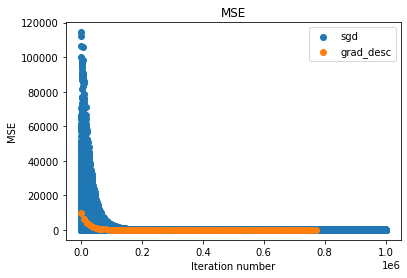

In [62]:
plt.scatter(range(len(errors2)), errors2, label='sgd')
plt.scatter(np.arange(0,len(errors1)*data.shape[0],data.shape[0]), errors1, label='grad_desc')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.show()

**Вывод:** Из графика видно, что скорость сходимости градиентного спуска выше, чем скорость сходимости стохастического градиентного спуска.



### Задание 2

Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [63]:
# Функция градиентного спуска с L2 регуляризацией
def grad_l2(X, y, iterations, lambd, alpha):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        old_W = W.copy()
        W -= (alpha * (1/n * 2 * X.T @ (y_pred - y) + 2 * lambd * W)) # градиент функции потерь после добавления L2 регуляризации

        w_list.append(W.copy())
        errors.append(err)

        if np.linalg.norm(W - old_W, ord=2) < 1e-6:
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            errors.append(err)
            print(i, W, err)
            break
        
    w_list = np.array(w_list)
    
    return y_pred, W, w_list, errors

75 [ 3.69442679 35.28448195 51.84339314 77.0216984 ] 25.840425365591173
72 [ 3.52947612 33.96367355 49.90230986 74.07123127] 47.633956349681895
69 [ 3.41488829 33.03620394 48.53931665 72.00255935] 79.98267461318626


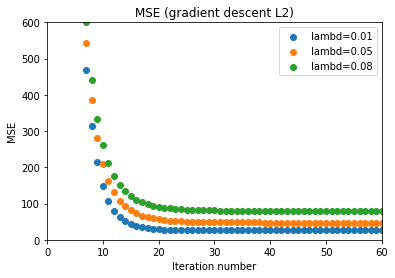

In [64]:
# Графики среднеквадратичной ошибки для различных значений коэффициента lambda после приминения функции градиентного спуска с L2 регуляризацией
y_pred3, W3, w_list3, errors3 = grad_l2(data, target, 10000, alpha=1e-1, lambd=0.01)
y_pred4, W4, w_list4, errors4 = grad_l2(data, target, 10000, alpha=1e-1, lambd=0.05)
y_pred5, W5, w_list5, errors5 = grad_l2(data, target, 10000, alpha=1e-1, lambd=0.08)
plt.scatter(range(len(errors3)), errors3, label = 'lambd=0.01' )
plt.scatter(range(len(errors4)), errors4, label = 'lambd=0.05')
plt.scatter(range(len(errors5)), errors5, label = 'lambd=0.08')
plt.title('MSE (gradient descent L2)')
plt.xlim([0, 60])
plt.ylim([0, 600])
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.show()

**Вывод**: График показывает, что при увеличении коэффициента $\lambda$ модель сильнее штрафует за большие веса, поэтому среднеквадратичная ошибка увеличивается и её минимум труднодостижим.

In [65]:
# Функция стохастического градиентного спуска с L2 регуляризацией
def sgd_l2(X, y, iterations, lambd, qty_in_batch=1, alpha=1e-1):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    w_list = [W.copy()]
    errors = []
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot(X_tmp.T, (y_pred_tmp - y_tmp)) + 2 * lambd * W)) # градиент функции потерь после добавления L2 регуляризации
            
        w_list.append(W.copy())
        errors.append(err)

        if i == iterations:
            y_pred_tmp = np.dot(X_tmp, W)
            errors.append(calc_mse(y_tmp, y_pred_tmp))
            print(i, W, err)
            break
    
    w_list = np.array(w_list)
    
    return y_pred_tmp, W, w_list, errors

20 [ 3.27703595 32.07648074 47.13894364 69.80146395] 121.90073019206586
20 [ 2.72944406 27.39383272 40.23860475 59.40028618] 743.5199993188971
20 [ 2.32935479 23.86164754 35.03581222 51.58911051] 1558.4361590315025


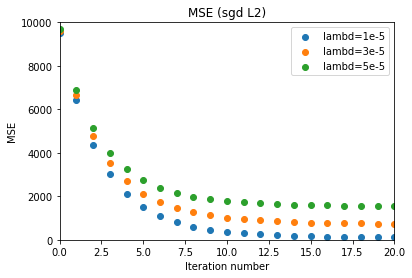

In [66]:
# Графики среднеквадратичной ошибки для различных значений коэффициента lambda после приминения функции стохастического градиентного спуска с L2 регуляризацией
y_pred6, W6, w_list6, errors6 = sgd_l2(data, target, 20, lambd=1e-5)
y_pred7, W7, w_list7, errors7 = sgd_l2(data, target, 20, lambd=3e-5)
y_pred8, W8, w_list8, errors8 = sgd_l2(data, target, 20, lambd=5e-5)
plt.scatter(range(len(errors6)), errors6, label = 'lambd=1e-5' )
plt.scatter(range(len(errors7)), errors7, label = 'lambd=3e-5')
plt.scatter(range(len(errors8)), errors8, label = 'lambd=5e-5')
plt.title('MSE (sgd L2)')
plt.xlim([0, 20])
plt.ylim([0, 10000])
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.show()

**Вывод**: График показывает, что при увеличении коэффициента $\lambda$ модель сильнее штрафует за большие веса, поэтому среднеквадратичная ошибка увеличивается и её минимум труднодостижим. В случае стохастического градиентного спуска модель штрафует за большие веса гораздо сильнее, чем в случае обычного.